## Machine Learning para a Detecção de Diabetes

*Para ver o artigo relacionado a este notebook*, [CLIQUE AQUI](https://liliancandido.medium.com/machine-learning-para-a-detecção-de-diabetes-1eab1cc48f47)

Diabetes é uma doença crônica na qual o corpo não produz insulina ou não consegue empregar adequadamente a insulina que produz.

De acordo com a [Associação Brasileira de Diabetes](https://diabetes.org.br/), a doença pode ser classificada como <font color='orange'>Tipo 1</font>, <font color='orange'>Tipo 2</font>, <font color='orange'>Gestacional</font> e ainda podem existir quadros de <font color='orange'>Pré-diabetes</font>.

Em algumas pessoas, o sistema imunológico ataca equivocadamente as células beta. Logo, pouca ou nenhuma insulina é liberada para o corpo. Como resultado, a glicose fica no sangue, em vez de ser usada como energia. Esse é o processo que caracteriza o Tipo 1 de diabetes, que concentra entre 5 e 10% do total de pessoas com a doença.

O Tipo 2 aparece quando o organismo não consegue usar adequadamente a insulina que produz; ou não produz insulina suficiente para controla a taxa de glicemia.

Durante a gravidez, para permitir o desenvolvimento do bebê, a mulher passa por mudanças em seu equilíbrio hormonal. A placenta, por exemplo, é uma fonte importante de hormônios que reduzem a ação da insulina, responsável pela captação e utilização da glicose pelo corpo. O pâncreas, consequentemente, aumenta a produção de insulina para compensar este quadro. Em algumas mulheres, entretanto, este processo não ocorre e elas desenvolvem um quadro de diabetes gestacional.

O termo pré-diabetes é usado quando os níveis de glicose no sangue estão mais altos do que o normal, mas não o suficiente para um diagnóstico de Diabetes Tipo 2. Obesos, hipertensos e pessoas com alterações nos lipídios estão no grupo de alto risco.

Informações de qualidade sobre diabetes e diagnósticos eficazes são essenciais para controlar a doença, evitar impactos negativos na saúde e para que se tenha uma vida longa, feliz e saudável. Considerando a questão dos diagnósticos rápidos e precisos, o uso de Machine Learning para detecções médicas pode ser um grande aliado e vem crescendo cada vez mais.

Contribuindo com a conscientização sobre a importância da prevenção e do tratamento da doença, preparei um projeto de Data Science onde construí um modelo de Machine Learning capaz de detectar o diabetes.

## 1. Obtenção dos Dados

Para a construção do modelo de Machine Learning foi utilizado o conjunto de dados Pima Indians Diabetes Database. O dataset é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais e está disponibilizado no site do Kaggle podendo ser acessado [AQUI](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data)
O conjunto de dados é composto por variáveis preditoras médicas e uma variável alvo. As variáveis preditoras incluem o número do IMC, nível de insulina, idade etc. Já a variável alvo, determina se houve ou não a ocorrência de diabetes.

## 2. Objetivo

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medidas diagnósticas incluídas no conjunto de dados e obter uma acurácia acima de 70%.

Como primeiro passo, foram importados os pacotes necessários e o dataset em formato csv:

In [1]:
# importar os pacotes necessários
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
# Importando o Dataset em csv
arquivo = pd.read_csv('diabetes_dataset.csv')

## 3. Análise Exploratória

Após realizar a importação dos pacotes e dos dados, para criar uma consciência situacional a respeito do formato dos dados, foi feita uma verificação das dimensões do Dataframe. As dimensões encontradas foram um total de 768 linhas e 10 colunas:

In [3]:
#visualizando quantidade de linhas e colunas:
arquivo.shape

(768, 10)

Apenas observando as primeiras linhas do Dataframe, foi possível notar que a coluna diabetes (nossa coluna alvo) continham dados em formato booleano. Logo, ficou claro que esses dados precisariam ser transformados em números antes de construir o modelo para que os cálculos pudessem ser realizados. Outro ponto importante observado aqui, é que algumas linhas continham valores missing ocultos (descritos como zero), como é o caso da coluna insulina. Ambos os casos foram retomados adiante, no momento de tratamento dos dados:

In [4]:
#visualizando as primeiras linhas:
arquivo.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


Ainda com o objetivo de criar uma consciência situacional inicial a respeito dos dados, foram verificadas também as últimas entradas do Dataframe, confirmando-se o número de linhas, valores missing ocultos e da continuidade dos demais dados:

In [5]:
#visualizando as últimas linhas:
arquivo.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


É sempre importante checar o tipo dos dados do Dataframe de forma geral, pois assim, pode-se verificar se existem mais valores com formatos diferentes do que aqueles verificados nas primeiras e últimas linhas.
O que foi possível observar é que com exceção da coluna diabetes, já observada antes, todas as outras colunas são do tipo numéricas(float e int):

In [6]:
#visualizando o tipo de cada coluna:
arquivo.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

Como em qualquer projeto de Data Science, a verificação da presença de valores ausentes no conjunto de dados é de extrema importância, pois é o reflexo direto da qualidade do mesmo. Nesse caso, não foram encontrados valores nulos, ou seja, campos em branco:

In [7]:
# Verificando se existem valores nulos
arquivo.isnull().values.any()

False

Por meio do método describe( ), foi possível exibir um resumo estatístico das variáveis numéricas, mais uma vez, podemos destacar os valores missing ocultos aparecendo nos cálculos estatísiticos:

In [9]:
# Verificando as estatísticas
arquivo.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809135
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


Foi criada uma função (def plot_corr) para que pudesse ser verificada a correlação entre as variáveis. Para isso, foi gerado um gráfico que mostra correlação de uma variável com todas as outras. A diagonal em amarelo mostra a correlação de uma variável com ela mesma, o que sempre será uma correlação maior possível:

In [18]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(arquivo, size=6):
    corr = arquivo.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 50) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

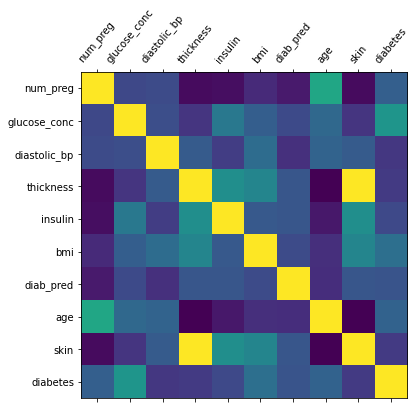

In [19]:
# Criando o gráfico
plot_corr(arquivo)

Avaliar a correlação é importante, para saber quais atributos são mais relevantes para a criação do modelo. Para para auxiliar na visualização dos dados de correlação, foi gerada também, uma tabela de correlação, onde foi considerado o seguinte:

+1  = forte correlação positiva   
 0   = não há correlação   
-1  = forte correlação negativa   


In [20]:
# Visualizando a correlação em tabela
arquivo.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


## 4. Tratamento e Preparação dos Dados:

Como observado anteriormente, foi necessário de realizar uma conversão dos dados da coluna diabetes, transformando-os assim em valores numéricos:

In [21]:
# Definindo as classes
# Todo valor True vai se transofmrar em 1 e todo valor False vai se transformar em 0
diabetes_map = {True : 1, False : 0}

In [22]:
# Aplicando o mapeamento do Dataset, transformando os dados com uso da função map()
arquivo['diabetes'] = arquivo['diabetes'].map(diabetes_map )

In [23]:
# Checando se os dados foram alterados:
arquivo.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


Uma etapa muito importante na construção de modelos de Machine Learning é realizar uma divisão dos dados em um dataset de treino para treinar o algoritmo e consequentemente criar o modelo e outro dataset de teste para avaliar os resultados do modelo. 
Nessa etapa foi realizada uma divisão de 70% para dados de treino e 30% para dados de teste:

In [24]:
# Dividindo o conjunto de dados 70% para dados de treino e 30% para dados de teste
import sklearn as sk

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [27]:
# Variável a ser prevista
atrib_prev = ['diabetes']

In [28]:
# Criando objetos
X = arquivo[atributos].values
Y = arquivo[atrib_prev].values

In [29]:
# Definindo a taxa de split
split_test_size = 0.30

In [30]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [31]:
# Imprimindo os resultados
print(f"{len(X_treino)/len(arquivo.index) * 100 :.2f}% nos dados de treino")
print(f"{len(X_teste)/len(arquivo.index) * 100 :.2f}% nos dados de teste")

69.92% nos dados de treino
30.08% nos dados de teste


In [32]:
#Verificando o Split
print(f"Original True  : {len(arquivo.loc[arquivo['diabetes'] == 1])} ({(len(arquivo.loc[arquivo['diabetes'] ==1])/len(arquivo.index) * 100):.2f}%)")
print(f"Original False : {len(arquivo.loc[arquivo['diabetes'] == 0])} ({(len(arquivo.loc[arquivo['diabetes'] ==0])/len(arquivo.index) * 100):.2f}%)")

print("")
print(f"Training True  : {len(Y_treino[Y_treino[:] == 1])} ({(len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100):.2f}%)")
print(f"Training False : {len(Y_treino[Y_treino[:] == 0])} ({(len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100):.2f}%)")

print("")
print(f"Test True  : {len(Y_teste[Y_teste[:] == 1])} ({(len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100):.2f}%)")
print(f"Test False : {len(Y_teste[Y_teste[:] == 0])} ({(len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100):.2f}%)")


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True  : 80 (34.63%)
Test False : 151 (65.37%)


Foi realizado também, um tratamento nos valores missing ocultos, onde se substituiu os valores iguais à zero, pela média dos dados:

In [33]:
# Verificando a existência de valores missings ocultos
print(f"# Linhas no dataframe {len(arquivo)}")
print(f"# Linhas missing glucose_conc: {len(arquivo.loc[arquivo['glucose_conc'] == 0])}")
print(f"# Linhas missing diastolic_bp: {len(arquivo.loc[arquivo['diastolic_bp'] == 0])}")
print(f"# Linhas missing thickness: {len(arquivo.loc[arquivo['thickness'] == 0])}")
print(f"# Linhas missing insulin: {len(arquivo.loc[arquivo['insulin'] == 0])}")
print(f"# Linhas missing bmi: {len(arquivo.loc[arquivo['bmi'] == 0])}")
print(f"# Linhas missing diab_pred: {len(arquivo.loc[arquivo['diab_pred'] == 0])}")
print(f"# Linhas missing age: {len(arquivo.loc[arquivo['age'] == 0])}")

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing diab_pred: 0
# Linhas missing age: 0


In [34]:
from sklearn.impute import SimpleImputer

In [36]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

## 5. Construindo e Treinando o Modelo:

Na etapa de construção do modelo de Machine Learning, foi escolhido o algoritmo GaussianNB que é uma função do pacote Naive Bayes pertencente ao sklearn. O GausianNB por sua vez,  foi instanciado na variável modelo_v1 e aplicado o treinamento:

In [37]:
# Importando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [38]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [39]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel()) #função ravel ajusta o shape do objeto

GaussianNB()

Após o treinamento foi realizado a verificação do modelo nos dados de treino onde a acurácia obtida foi de 0.7542:

In [40]:
# Importando metrics
from sklearn import metrics

In [69]:
# Verificando os dados de treino
nb_predict_train = modelo_v1.predict(X_treino)
print(f"Exatidão (Accuracy): {(metrics.accuracy_score(Y_treino, nb_predict_train)):.4f}")
print()

Exatidão (Accuracy): 0.7542



Já na verificando a exatidão no modelo nos dados de teste, a acurácia obtida foi de 0.7359:

In [70]:
# Verificando os dados de teste
nb_predict_test = modelo_v1.predict(X_teste)
print(f"Exatidão (Accuracy): {(metrics.accuracy_score(Y_teste, nb_predict_test)):.4f}")
print()

Exatidão (Accuracy): 0.7359



Um dos pontos que podem ser considerados ao buscar a otimização de um modelo é a alteração do próprio algoritmo de Machine Learning. Considerando isso, foi realizado um teste de otimização com o algoritmo RandomForest:

In [43]:
# Importando RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Criando o modelo preditivo
modelo_v2 = RandomForestClassifier(random_state = 42)

In [45]:
# Treinando o modelo
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

Com RandomForestClassifier, foram obtidos as seguintes acurácias:

Dados de Treino: 1.0000   
Dados de Teste: 0.7403

In [71]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print(f"Exatidão (Accuracy): {(metrics.accuracy_score(Y_treino, rf_predict_train)):.4f}")

Exatidão (Accuracy): 1.0000


In [72]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print(f"Exatidão (Accuracy): {(metrics.accuracy_score(Y_teste, rf_predict_test)):.4f}")
print()

Exatidão (Accuracy): 0.7403



Ao comparar a utilização dos dois algorítimos, podemos observar que Ramdom Forest apresentou uma maior acurácia:

Modelo usando algoritmo Naive Bayes         = 0.7359   
Modelo usando algoritmo Random Forest       = 0.7403

## 6. Fazendo Previsões Com o Modelo Treinado

Com o modelo treinado, chegou o momento de realizar previsões com o mesmo. Mas antes disso, foi salva a versão do modelo escolhido com a utilização do pacote pickle, isso é importante para viabilizar a utilização do modelo mais tarde:

In [48]:
import pickle

In [50]:
# Salvando o modelo 
filename = 'modelo_treinado_v2.sav'
pickle.dump(modelo_v2, open(filename, 'wb'))

Finalmente, foi possível importar o modelo salvo e aplicar a realização das previsoes:

In [51]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[25].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[29].reshape(1, -1))
print(resultado1)
print(resultado2)

[1]
[0]


Diabetes e Machine Learning

Em conclusão, a utilização da tecnologia na área de saúde está em constante evolução e contar com modelos de Machine Learning precisos certamente torna-se um forte aliado no momento de um diagnóstico precoce de diabetes. Não excluindo é claro, a importância da conscientização, prevenção e cumprimento dos tratamentos necessários.

O modelo criado aqui, apesar de atingir o objetivo proposto, certamente tem espaço para melhorias, mais testes de desempenho com outros algoritmos, além da otimização de seus parâmetros. Fique a vontade para utilizá-lo ou aplicar melhorias.